In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

df=pd.read_csv("python_test_dataset_flights_6months.csv")

# Display the first few rows and summary statistics

df.head()

,buyer_id,supplier_id,to_airport,from_airport,journey_type,pax,costprice,markup,selling_price,booking_date,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,CCU,ATL,round trip,4,422.296189,92.138566,537.469396,2024-03-01,PayPal,Yes,369.648995,Web,confirmed,04-03-2024,5.374694,0.000000,No
1,299,3,HYD,HYD,round trip,2,692.981884,375.363227,1162.185918,2024-03-01,Credit Card,Yes,799.302917,Web,confirmed,14-05-2023,11.621859,0.000000,No
2,64,4,BLR,SEA,one way,3,797.788149,404.749466,1303.724982,2024-03-01,Bank Transfer,Yes,896.647571,Web,confirmed,26-09-2023,0.000000,0.000000,No
3,345,6,DEL,DEN,one way,2,286.472882,92.202248,363.308088,2024-03-01,Credit Card,Yes,249.868124,Android,confirmed,17-10-2024,0.000000,9.220225,Yes
4,31,6,DEL,BOM,one way,4,840.560581,173.595343,1057.554760,2024-03-01,Debit Card,Yes,727.341978,Web,confirmed,11-09-2023,0.000000,0.000000,No


In [3]:
df.describe()

,buyer_id,supplier_id,pax,costprice,markup,selling_price,refund_amount,cashback,coupon_redeem
count,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000,32240.000000
mean,249.198728,4.132351,2.995440,534.454208,214.911897,749.185111,321.169098,1.800790,7.230413
std,144.847428,1.987509,1.414173,280.406808,176.536047,414.305052,339.865111,3.790310,13.746741
min,1.000000,1.000000,1.000000,50.005653,-51.478750,50.766206,0.000000,0.000000,-5.147875
25%,123.000000,2.000000,2.000000,292.391617,78.381381,399.945463,0.000000,0.000000,0.000000
50%,248.000000,4.000000,3.000000,533.950333,171.356857,729.318731,221.482908,0.000000,0.000000
75%,374.000000,6.000000,4.000000,773.706987,305.323878,1062.007949,593.005610,0.000000,8.969851
max,499.000000,7.000000,5.000000,1150.283064,1197.747825,2126.801346,1462.725105,21.268013,91.593305


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32240 entries, 0 to 32239
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   buyer_id            32240 non-null  int64  
 1   supplier_id         32240 non-null  int64  
 2   to_airport          32240 non-null  object 
 3   from_airport        32240 non-null  object 
 4   journey_type        32240 non-null  object 
 5   pax                 32240 non-null  int64  
 6   costprice           32240 non-null  float64
 7   markup              32240 non-null  float64
 8   selling_price       32240 non-null  float64
 9   booking_date        32240 non-null  object 
 10  payment_method      32240 non-null  object 
 11  refund_status       32240 non-null  object 
 12  refund_amount       32240 non-null  float64
 13  channel_of_booking  32240 non-null  object 
 14  booking_status      32240 non-null  object 
 15  travel_date         32240 non-null  object 
 16  cash

In [53]:
### Convert booking_date and travel_date to datetime
df['booking_date'] = pd.to_datetime(df['booking_date'], format='%d-%m-%Y')
df['travel_date'] = pd.to_datetime(df['travel_date'], format='%d-%m-%Y')

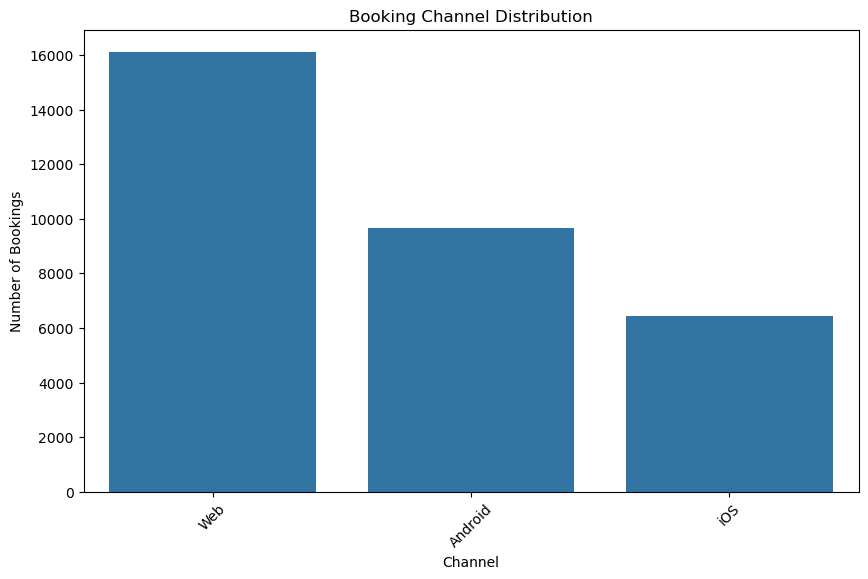

In [61]:
### Short-term observation 1: Booking Channel Trends
channel_counts = df['channel_of_booking'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Booking Channel Distribution')
plt.xticks(rotation=45)
plt.xlabel('Channel')
plt.ylabel('Number of Bookings')
plt.show()

In [57]:
### Short-term observation 2: Refund Rates
refunds = df[df['refund_status'] == 'Yes']['refund_amount'].sum()
total_sales = df['selling_price'].sum()
refund_rate = refunds / total_sales * 100
print(f"Total Refund Rate: {refund_rate:.2f}%")

Total Refund Rate: 42.87%


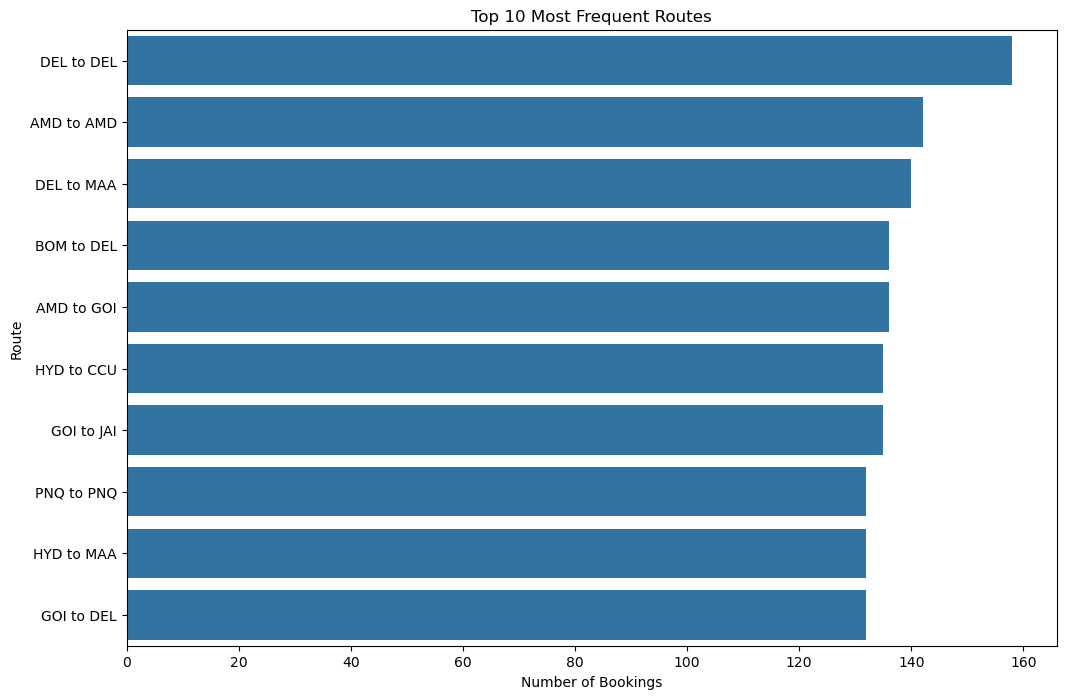

In [63]:
### Short-term observation 3: Frequent Routes
route_counts = df.groupby(['from_airport', 'to_airport']).size().reset_index(name='count')
top_routes = route_counts.sort_values(by='count', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.title('Top 10 Most Frequent Routes')
plt.xlabel('Number of Bookings')
sns.barplot(x='count', y=top_routes['from_airport'] + ' to ' + top_routes['to_airport'], data=top_routes)

plt.ylabel('Route')
plt.show()

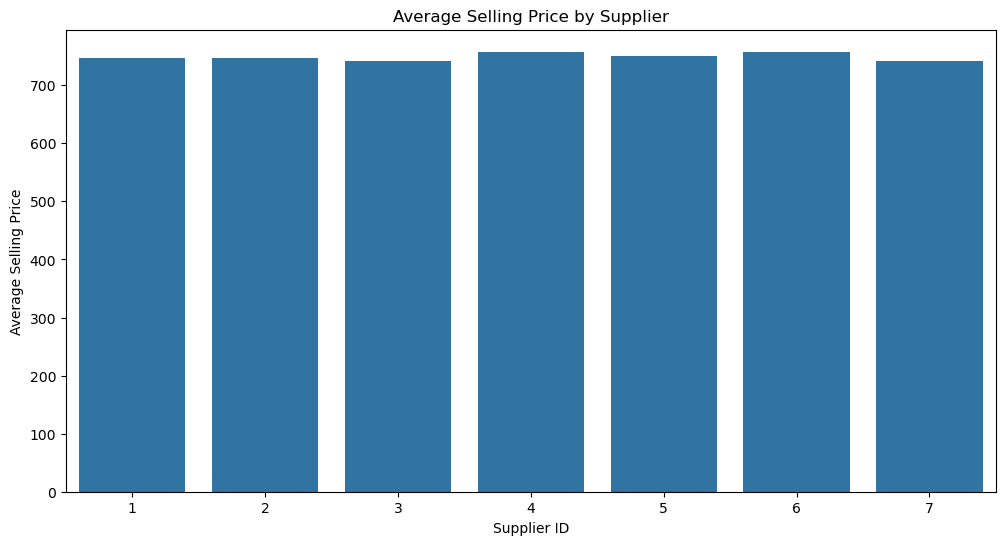

In [65]:
# Long-term observation: Supplier Performance
supplier_performance = df.groupby('supplier_id').agg({'selling_price': 'mean', 'markup': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='supplier_id', y='selling_price', data=supplier_performance)
plt.title('Average Selling Price by Supplier')
plt.xlabel('Supplier ID')
plt.ylabel('Average Selling Price')
plt.show()